In [ ]:
import pandas as pd
import networkx as nx

# Load datasets
edges_df = pd.read_csv("/content/sample_data/musae_RU_edges.csv")  # Replace with your edges file path
target_df = pd.read_csv("/content/sample_data/musae_RU_target.csv")  # Replace with your target file path

# Create the graph
G = nx.Graph()
G.add_edges_from(edges_df.values)

# Add attributes to the nodes, ensuring all nodes from target_df are included
# If a node is not in the graph, it will be added with its attributes.
for _, row in target_df.iterrows():
    node_id = row['id']
    attributes = {
        'new_id': row['new_id'],
        'days': row['days'],
        'views': row['views'],
        'partner': row['partner'],
        'mature': row['mature']
    }
    G.add_node(node_id, **attributes)  # Use add_node to ensure node exists

def calculate_tu_rank(graph, temporal_weight=0.5, influence_weight=0.5):
    """
    Calculate TU Rank for each node in the graph.
    :param graph: NetworkX graph
    :param temporal_weight: Weight for temporal activity
    :param influence_weight: Weight for user influence
    :return: Dictionary of TU Rank scores
    """
    # Get nodes that have the 'days' attribute
    nodes_with_days = [node for node in graph.nodes if 'days' in graph.nodes[node]]

    # Normalize temporal activity (e.g., 'days' attribute) only for nodes with 'days'
    if nodes_with_days:  # Check if there are any nodes with 'days' attribute
        max_days = max(graph.nodes[node]['days'] for node in nodes_with_days)
        temporal_scores = {node: graph.nodes[node]['days'] / max_days for node in nodes_with_days}
    else:
        temporal_scores = {}  # Handle case where no nodes have 'days'

    # Normalize influence (e.g., degree centrality as a proxy)
    degree_centrality = nx.degree_centrality(graph)
    max_degree = max(degree_centrality.values())
    influence_scores = {node: degree_centrality[node] / max_degree for node in graph.nodes}

    # Combine scores to calculate TU Rank, considering only nodes with 'days' for temporal score
    tu_scores = {
        node: temporal_weight * temporal_scores.get(node, 0) + influence_weight * influence_scores[node]  # Use 0 if 'days' is missing
        for node in graph.nodes
    }

    return tu_scores

# Calculate TU Rank
tu_scores = calculate_tu_rank(G)

# Sort nodes by TU Rank score
ranked_nodes = sorted(tu_scores.items(), key=lambda x: x[1], reverse=True)

# Display top influencers
print("Top 10 Influencers by TU Rank:")
for rank, (node, score) in enumerate(ranked_nodes[:10], start=1):
    print(f"Rank {rank}: Node {node}, TU Rank Score: {score}")

Top 10 Influencers by TU Rank:
Rank 1: Node 1800, TU Rank Score: 0.5
Rank 2: Node 796883, TU Rank Score: 0.5
Rank 3: Node 3001738, TU Rank Score: 0.47652519893899203
Rank 4: Node 8109454, TU Rank Score: 0.4409814323607427
Rank 5: Node 10558045, TU Rank Score: 0.41909814323607425
Rank 6: Node 10663608, TU Rank Score: 0.4187002652519894
Rank 7: Node 10813318, TU Rank Score: 0.4169761273209549
Rank 8: Node 11040961, TU Rank Score: 0.4159151193633952
Rank 9: Node 11418969, TU Rank Score: 0.4129973474801061
Rank 10: Node 11678436, TU Rank Score: 0.4123342175066313


In [ ]:
target_df['days'].fillna(1, inplace=True)
target_df['views'].fillna(1, inplace=True)


<ipython-input-14-5d3d3f5153ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  target_df['days'].fillna(1, inplace=True)
<ipython-input-14-5d3d3f5153ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
print("TU Rank Scores:")
for node, score in tu_scores.items():
    print(f"Node {node}: {score}")


Streaming output truncated to the last 5000 lines.
Node 2629: 0.002034174125305126
Node 2793: 0.0028478437754271765
Node 2031: 0.0004068348250610252
Node 2760: 0.0004068348250610252
Node 3059: 0.0004068348250610252
Node 3167: 0.0008136696501220504
Node 4205: 0.0052888527257933275
Node 1167: 0.0012205044751830757
Node 3688: 0.0004068348250610252
Node 130: 0.0032546786004882017
Node 3293: 0.004475183075671277
Node 1674: 0.0008136696501220504
Node 4021: 0.0032546786004882017
Node 1001: 0.0012205044751830757
Node 3507: 0.0004068348250610252
Node 2688: 0.0008136696501220504
Node 2773: 0.0012205044751830757
Node 1951: 0.0008136696501220504
Node 1762: 0.004068348250610252
Node 2328: 0.002034174125305126
Node 2866: 0.0004068348250610252
Node 3274: 0.0016273393002441008
Node 1225: 0.0028478437754271765
Node 4324: 0.0032546786004882017
Node 1438: 0.002034174125305126
Node 2451: 0.0016273393002441008
Node 2266: 0.0032546786004882017
Node 1930: 0.004068348250610252
Node 2159: 0.0028478437754271765

In [ ]:
print("Non-zero TU Scores:", {k: v for k, v in tu_scores.items() if v > 0})


Non-zero TU Scores: {0: 0.008136696501220503, 646: 0.3034987794955248, 2510: 0.1387306753458096, 2425: 0.28722538649308377, 2596: 0.026851098454027663, 85: 0.0024410089503661514, 1725: 0.24084621643612691, 208: 0.16232709519934904, 1302: 0.04434499593165175, 3534: 0.10292921074043937, 57: 0.04922701383238405, 3948: 0.10252237591537836, 297: 0.07241659886086248, 1800: 0.5, 2767: 0.02441008950366151, 251: 0.02969894222945484, 907: 0.177786818551668, 598: 0.22416598860862488, 1786: 0.03580146460537022, 1860: 0.03905614320585842, 3294: 0.053702196908055326, 1: 0.004068348250610252, 3633: 0.04353132628152969, 2535: 0.07445077298616762, 6: 0.05614320585842148, 1866: 0.0004068348250610252, 1276: 0.18470301057770544, 2589: 0.014239218877135883, 4082: 0.027257933279088688, 571: 0.0052888527257933275, 2: 0.009764035801464606, 3480: 0.005695687550854353, 1165: 0.024816924328722536, 648: 0.012611879576891782, 1560: 0.018307567127746133, 367: 0.022375915378356388, 2879: 0.01790073230268511, 344: 0.

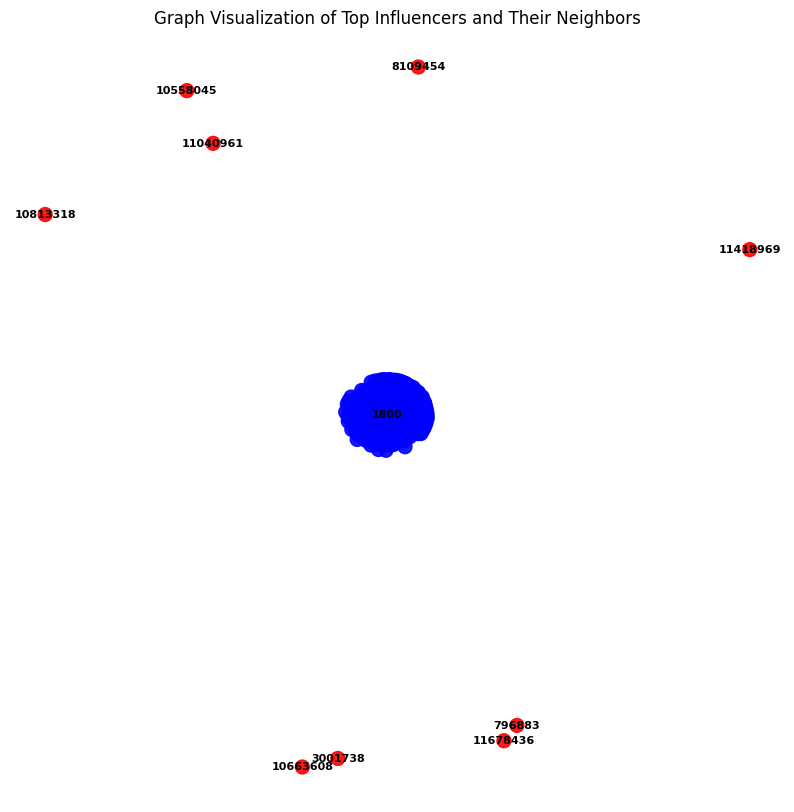

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a subgraph with top influencers and their neighbors
top_subgraph_nodes = set(top_nodes)
for node in top_nodes:
    top_subgraph_nodes.update(G.neighbors(node))  # Add neighbors of top influencers

top_subgraph = G.subgraph(top_subgraph_nodes)

# Assign colors to highlight top influencers in the subgraph
node_colors = ['red' if node in top_nodes else 'blue' for node in top_subgraph.nodes()]

# Draw the subgraph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(top_subgraph, seed=42)  # Layout for visualization
nx.draw_networkx_nodes(top_subgraph, pos, node_size=100, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(top_subgraph, pos, alpha=0.5)
nx.draw_networkx_labels(
    top_subgraph,
    pos,
    labels={node: node for node in top_nodes},
    font_size=8,
    font_color='black',
    font_weight='bold'
)

plt.title("Graph Visualization of Top Influencers and Their Neighbors")
plt.axis('off')
plt.show()
